In [3]:
!pip install rasterio
!pip install --upgrade pandas

/Users/ethanhsiao/opt/anaconda3/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:18: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
     |████████████████████████████████| 21.1 MB 748 kB/s eta 0:00:01     |████████████████████▏           | 13.3 MB 9.9 MB/s eta 0:00:01


In [34]:
import rasterio
import geopandas as gpd
from pathlib import Path
import asf_search
from shapely.geometry import shape

In [35]:
place_aoi = gpd.read_file('/Users/ethanhsiao/Documents/ground-swath/data/shape.shp')

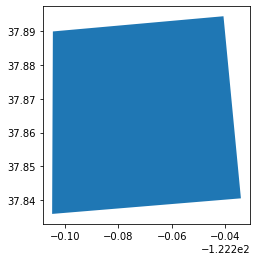

In [36]:
place_aoi.geometry.plot()

In [ ]:
#place_aoi_2 = gpd.read_file('/Users/ethanhsiao/Documents/ground-swath/data/shape2.shp')
#place_aoi_2.geometry.plot()

In [37]:
place_wkt = place_aoi.geometry.to_wkt()[0]

In [38]:
place_wkt

'POLYGON ((-122.25217442555794 37.86960413795028, -122.26579789511528 37.867987646118614, -122.26621579295447 37.87399157986792, -122.25652056308546 37.8753770335588, -122.25217442555794 37.86960413795028))'

In [54]:
opts = {
    'platform': 'S1', #asf.PLATFORM.SENTINEL1
    'start': '2019-01-01',
    'end': '2020-02-01',
    'maxResults': 100
    #'processingLevel': asf_search.PRODUCT_TYPE.RTC_HIGH_RES, processingLevel=asf.PRODUCT_TYPE.METADATA,
    #'polarization': asf_search.POLARIZATION.HH_HV,
    #'flightDirection': asf_search.FLIGHT_DIRECTION.ASCENDING
}

In [55]:
results = asf_search.geo_search(intersectsWith=place_wkt, **opts)
print(f'{len(results)} results found')

100 results found


In [75]:
#from Angela: splitting by platform S1A/S1B and ascending/descending flight direction
S1A = []
S1B = []
ascend_ID = []
descend_ID = []
for i in range(len(results)):
    if 'Sentinel-1A' in results[i].properties['platform']:
        S1A.append(i)
    else:
        S1B.append(i)
    if 'ASCENDING' in results[i].properties['flightDirection']:
        ascend_ID.append(i)
    else:
        descend_ID.append(i)
print(ascend_ID)
print(S1A)

[8, 9, 10, 11, 32, 33, 34, 35, 36, 37]
[38, 39, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 95, 96, 97, 98, 99]


In [76]:
#longitude/latitude
latitude = []
longitude = []
for i in range(len(results)):
    latitude.append(float(results[i].properties['centerLat']))
    longitude.append(float(results[i].properties['centerLon']))
plt.figure('Observations')
plt.clf()
for i in range(len(results)):
    if i in ascend_ID:
        plt.scatter(longitude[i],latitude[i],c='red')
    else:
        plt.scatter(longitude[i],latitude[i],c='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 100 Sentinel 1 Observations')

TypeError: float() argument must be a string or a number, not 'NoneType'

In [80]:
#processingLevel
metadata = []
raw = []
grd_hd = []

for i in range(len(results)):
    if 'METADATA_RAW' in results[i].properties['processingLevel']:
        metadata.append(i)
    elif 'GRD_HD' in results[i].properties['processingLevel']:
        grd_hd.append(i)
    else:
        raw.append(i)
raw[:5]

[1, 2, 3, 6, 7]

In [100]:
results_processed = {}
for i, item in enumerate(results):
    results_processed[i] = item.geometry
    for j in item.properties:
        results_processed[i][j] = item.properties[j]
results_processed

{0: {'coordinates': [[[-119.8258, 36.3283],
    [-122.5517, 36.5977],
    [-122.1561, 38.553],
    [-119.3568, 38.2823],
    [-119.8258, 36.3283]]],
  'type': 'Polygon',
  'beamModeType': 'IW',
  'browse': [],
  'bytes': '41318',
  'centerLat': '37.4486',
  'centerLon': '-120.9719',
  'faradayRotation': None,
  'fileID': 'S1B_IW_RAW__0SDV_20200128T140706_20200128T140738_020018_025DFD_DB27-METADATA_RAW',
  'fileName': 'S1B_IW_RAW__0SDV_20200128T140706_20200128T140738_020018_025DFD_DB27.iso.xml',
  'flightDirection': 'DESCENDING',
  'frameNumber': '466',
  'granuleType': 'SENTINEL_1B_FRAME',
  'groupID': 'S1B_IWDV_0466_0472_020018_042',
  'insarStackId': None,
  'md5sum': '69dfeab8178057b3fcf7f7cfaf225cb5',
  'offNadirAngle': None,
  'orbit': '20018',
  'pathNumber': '42',
  'platform': 'Sentinel-1B',
  'pointingAngle': None,
  'polarization': 'VV+VH',
  'processingDate': '2020-01-28T14:07:06.000000',
  'processingLevel': 'METADATA_RAW',
  'sceneName': 'S1B_IW_RAW__0SDV_20200128T140706_2

In [103]:
import geopandas as gpd

In [104]:
gdf = gpd.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.coordinates[0], df.coordinates[1]))

NameError: name 'geopandas' is not defined